# Практическая работа №3: Статический анализ социальных сетей
Балакин Владислав. Гр. 0381.

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

Вычисление цензуса:  
$M = \frac{1}{2} trace(𝐗𝐗)$  
$A = trace(𝐗𝐗^{T}) - 2M$  
$N = C_g^2 - A - M$  

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}$.

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}$,

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g$,

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$,

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+})$.

**Вычисление доверительного интервала для оценки P:**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}$.

ДИ: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{upper} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha$ - некоторый уровень значимости, $(1 - \alpha)$ - доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

In [3]:
library(igraph)

In [28]:
#consts
g <- 84
p <- 0.75
P_0 <- 0.59
alpha <- 0.02

 1.  Моделирование случайного орграфа $G_𝑑$ на основе модели Эрдеша—Реньи: $G_𝑑 = G (𝑔, 𝑝)$, где $𝑔$ – количество акторов, $𝑝$ – вероятность появления дуги между акторами. Ознакомьтесь с данной моделью и опишите её.

In [5]:
graph <- erdos.renyi.game(g, p, directed=TRUE)

Данная модель генерирует граф с $g$ вершинами, связи между которыми генерируются с вероятностью $p$. Всего вершин 84, вероятность равна 0,75%.

2. Отобразить полученный орграф.

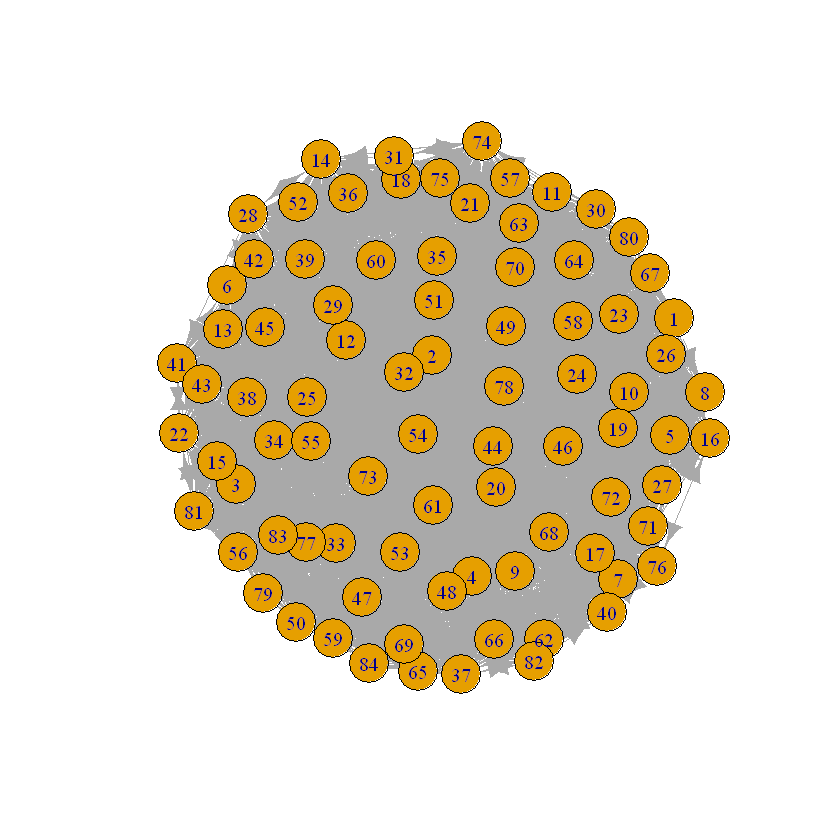

In [6]:
plot(graph, layout=layout_with_kk, label=colnames(graph))


Так как вероятность достаточна высока, а именно 75% , в связи с высокой вероятностью появления ребра между вершинами, в данном графе довольно много ребер,

3. Вычислить «пятичисловую сводку» для графа $G_𝑑$.

In [8]:
#размер
s <- length(V(graph))
cat("Размер сети:", s, "\n\n")

#плотность
cat("Плотность:", length(E(graph))/choose(s,2), "\n\n")

#компоненты
cat("Компоненты связанности: ", count_components(graph, mode = "strong"), "\n\n") 
 
#диаметр сети
cat("Диаметр сети:", diameter(graph), "\n\n")

#коэффициент кластеризации
cat("Коэффициент кластеризации:", transitivity(graph), "\n")

Размер сети: 84 

Плотность: 1.485083 

Компоненты связанности:  1 

Диаметр сети: 2 

Коэффициент кластеризации: 0.9355588 


4. Вычислить цензус диад. Сделать выводы

In [9]:
cens <- dyad_census(graph)
M <- cens$mut
A <- cens$asym
N <- cens$null
cens

$mut
[1] 1916

$asym
[1] 1345

$null
[1] 225

Вывод: 1) в сгенерированной сети преобладает число пар акторов с взаимными связями
       2) в сети довольно много односторонних связей, что вполне согласуется с высокой вероятностью создания ребра

5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [30]:
d <- 70
ind_kp <- (2*(g-1)*cens$mut-g*d*d)/(g*d*(g-1-d))
cat("При фиксированном d=70 индекс равен: ", ind_kp)

При фиксированном d=70 индекс равен:  -1.223757

In [31]:
x <- as.matrix(as_adjacency_matrix(graph))
x_plus <- rowSums(x)
S_x <- sum(x)
S_2_x <- sum(x_plus**2)
x_i_plus <- colSums(x)


ind_kp_free <- (2*(g - 1)^2 * M - S_x^2 + S_2_x)/(S_x*(g - 1)^2 - S_x^2 + S_2_x)
cat("При свободном выборе индекс равен: ", ind_kp_free)

При свободном выборе индекс равен:  -0.008958302

Выводы:  
при фиксированном выборе 70 акторов они будут более склонны образовывать односторонние связи или не образовывать их вовсе, чем при свободном. В свободном режиме выбора акторы имеют склонность не образовывать связи

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [33]:
res <- (d**2)/((g - 1)**2)
cat("Вероятность при фиксированном выборе", res)

Вероятность при фиксированном выборе 0.7112789

In [35]:
res2 <- (sum(rowSums(x)*colSums(x)) / (g - 1)**2) / g
cat("Вероятность при свободном выборе", res2)


Вероятность при свободном выборе 0.551547

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы

In [36]:
g_func <- function(t) {
    return(sum(x_plus[1:t]) -t*(t-1) - if(t>=g) 0 else sum(min(x_plus[(t+1):g], rep(t, (g-t-1+1)))))
}

f_func <- function(t) {
    return(sum(x_plus[1:t]) - t*(g-1)-choose(g,2))
}

M.min <- f_func(0)
for(i in 1:g) {
    if(M.min < f_func(i)){
        M.min <- f_func(i)
    }
}

g_max <- g_func(0)
for(i in 1:g) {
    if(g_max < g_func(i)){
        g_max <- g_func(i)
    }
}
M.max <- 0.5*(sum(x_plus)-g_max)
           
p_b <- (M-M.min)/(M.max-M.min)
p_b

[1] 0.9619159

Вывод:
согласно полученному значению индекса - акторы довольно склонны образовывать взаимные связи

 8. Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $G_𝑑$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2)$ при уровне значимости $𝛼$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [37]:
I <- sum(x)
zI <- (I - g * (g - 1) / 2) / (g * (g - 1) / 4) ** (1 / 2)
p_value <- 0.5 - 0.5*pnorm(zI)
cat("Статистика критерия: ", zI, " , max значения уровня значимости: ", p_value, " , гипотеза верна: ", p_value >= alpha/2,"\n")

Статистика критерия:  40.50372  , max значения уровня значимости:  0  , гипотеза верна:  FALSE 


Вывод:  
согласно проверке гипотезы, число дуг не имеет данного биномиального распределения при уровне значимости $\alpha = 0.04$

 9. Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $G_𝑑$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0)$ при уровне значимости $𝛼$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [42]:
I <- sum(x)
zI <- (I - P_0*g * (g - 1)) / (g * (g - 1)*P_0*(1-P_0)) ** (1 / 2)
p_value <- 0.5 - 0.5*pnorm(zI)
cat("Статистика критерия: ", zI, " , max значения уровня значимости: ", p_value, " , гипотеза верна: ", p_value >= alpha/2,"\n")

Статистика критерия:  25.89698  , max значения уровня значимости:  0  , гипотеза верна:  FALSE 


Вывод:  
согласно проверке гипотезы, число дуг не имеет данного биномиального распределения при уровне значимости $\alpha = 0.04$

 10. Построить доверительный интервал для оценки параметра $𝑝$ с доверительной надёжностью $(1 − 𝛼)$. Сделать выводы.

In [43]:
p_ocenka <- I/(g*(g-1))
cat("Оценка параметра P: ", p_ocenka, "\n")

zA <- abs(qnorm(alpha/2))
p_low <- p_ocenka - zA*sqrt(p_ocenka*(1-p_ocenka)/(g*(g-1)))
p_upp <- p_ocenka + zA*sqrt(p_ocenka*(1-p_ocenka)/(g*(g-1)))
cat("Доверительный интервал для параметра P: [",p_low,", ",p_upp,"]")

Оценка параметра P:  0.7425416 
Доверительный интервал для параметра P: [ 0.7303598 ,  0.7547234 ]

Вывод:  
можно заметить, что заданное по условию $p=0.75$ входит в полученный доверительный интервал, что говорит о верной оценке

## Выводы

В ходе практической работы был проведен статистический анализ случайно смоделированного ориентированного графа на основе модели Эрдеша—Реньи с использованием библиотек igraph. По полученным расчетам было отмечено, что при заданных параметрах модели коэффициент кластеризации близок к 1, количество взаимных и односторонних диад довольно высоко, что вполне согласуется с заданным параметром $p$ для генерации ребер. Также были расчитаны индексы взаимности Каца—Пауэла и Бандиопадхьяйя. Согласно индексам взаимности Каца-Пауэла, для фиксированного выбора $d=80$ акторы склонны к образованию односторонник связей или не образовывать их вовсе, для случайного выбора - склонны не выбирать друг друга взаимно. Согласно же индексу взаимности Бандиопадхъяйя, актора склонны взаимно выбирать друг друга. Были также проверены гипотезы о принадлежности числа дуг к биномиальным распределениям, причем оказалось, что при заданном уровне значимости они неверны. Еще был построен доверительный интервал для параметра модели $p$, причем он входит в расчитанный ДИ, что говорит о верной оценке.